# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Analysis of the Effectiveness of Three Different Sales Methods to Sell New Products
## 1. Introduction

The goal of this analysis was to investigate the effectiveness of targeted calls, emails, and a combination of the two (email & call) sales strategies prior to the launch of a new product line for Pens and Printers. First-party data was collected by the business over a 6-week period with the goal of achieving the highest gross revenue. Therefore, the target metric chosen was the revenue generated by the new products sold, as this variable was dependent on the other features from the provided dataset.

## 2. Method

First, the product sales dataset was inspected using Excel, as the data was made available in a CSV file format. This revealed a granular table of 15,001 rows (the first row being headers) and 8 columns, with some missing values under the revenue column, labelled as 'NA'.

Next, the CSV was imported into Python in order to clean, transform, and analyse the data. This was achieved using Pandas' read_csv function, where missing values were explicitly stated as 'NULL', because the alternative label of NA did not the produce desired results. The raw data has been shown below as table 1.

**Table 1.** Raw product sales data.

In [1]:
# Importing the necessary extensions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the initial product_sales.csv as a DataFrame:  df
# Found null strings under revenue, which weren't picked up by default, so I've specified to identify them in my initial read
df = pd.read_csv('product_sales.csv', na_values='NULL')

df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


After a deeper dive into the data, the following list of amendments were made for each column:

- **Week**: There were 6 unique values, ranging from 1 to 6, matching the description provided. The data type was converted from int64 to int8.
- **Sales_method**: There were 5 unique entries, where 2 were unexpected. These appeared to have been caused by oversights in their spellings and were corrected using string replacement. The data type was converted from object to category.
- **Customer_id**: There were 15,000 unique characters present, as was expected. No changes were made.
- **Nb_sold**: There were 10 unique values present, ranging from 7 to 16, as was expected. The data type was converted from int64 to int8.
- **Revenue**: There were 1074 null values within the series. These were replaced by the mean of ordered categorical groups and kept as float64.
- **Years_as_customer**: There were 42 unique values present, where 2 were unexpected. Those 2 outliers exceeded the max valid age and, therefore, were replaced with the max value of 40, using string replacement. The data type was converted from object to int8.
- **Nb_site_visits**: There were 27 unique values present, ranging from 12 to 41, as was expected. The data type was converted from object to int8.
- **State**: There were 50 unique entries, as was expected. The data type was converted from object to category.

The reason behind why the data types were converted was to reduce memory usage and improve computational performance. List comprehension was used to achieve this.

For the missing revenue values, it was thought that the possibility of results becoming unrepresentative was too great if 7.16% (1074 / 15000 * 100) of the data was removed from the sample population. Where, some of the features of the dataset could have been impacted at a greater proportion than other ones, resulting in analysis that is over-represented by outliers. The groups chosen were week and nb_sold, as these produced lower standard deviation (STD) scores than the mean of the total population. Additionally, the mean was chosen over the median, because in literature the mean was stated to be more resistant to data skew; the data was assumed to not follow normal distribution prior to analysis.

Lastly, the data was re-validated to confirm whether the data cleaning and other pre-processing techniques had successfully been applied. The validated table has been shown below as table 2.

In [2]:
# Information about the dataset
print(df.isna().sum().sort_values())
print('')
print(df.dtypes)
print('')
print(df.memory_usage())
print('')
print(df.describe())
print('')
print(df.shape)
print('')

# Checking data for outliers
df.sort_values('years_as_customer')
present_year = 2024
company_formed = 1984
customers_years_range = present_year - company_formed
outliers = df.loc[df['years_as_customer'] >= customers_years_range]
print(outliers)
print('')

# Loop to extract all unique values from each column in df
for column in df.columns:
    unique_values = df[column].sort_values(ascending=True).unique()
    length = len(unique_values)
    print(f'There were {length} unique values in {column}: {unique_values}')
    print('')

week                    0
sales_method            0
customer_id             0
nb_sold                 0
years_as_customer       0
nb_site_visits          0
state                   0
revenue              1074
dtype: int64

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

Index                   128
week                 120000
sales_method         120000
customer_id          120000
nb_sold              120000
revenue              120000
years_as_customer    120000
nb_site_visits       120000
state                120000
dtype: int64

               week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.965933       24.990867
std        1.656420      1.812213  ...     

In [3]:
# Standardizing the sales_method column
df['sales_method'] = df['sales_method'].str.upper()
df['sales_method'] = df['sales_method'].str.replace('EMAIL', 'EM')  # Couldn't replace 'Em + call' to 'Email + call'
df['sales_method'] = df['sales_method'].str.replace('EM', 'EMAIL')  # This worked
df['sales_method'] = df['sales_method'].str.title()

# Amending outliers to the maximum value
df['years_as_customer'] = df['years_as_customer'].replace(63, 40)
df['years_as_customer'] = df['years_as_customer'].replace(47, 40)

In [4]:
# Converting data types to save on memory usage
# Lists of data types by column
categories = ['state', 'sales_method']
integers = ['nb_sold', 'week', 'years_as_customer', 'nb_site_visits']

# List comprehension loop
for types in df:
    # Categories
    for category in categories:
        if types == category:
            df[types] = df[types].astype('category')
            
    # Integers
    for integer in integers:
        if types == integer:
            df[types] = df[types].astype('int8')

# Re-validating results
print(df.dtypes)
print('')
print(df.memory_usage())
print('')
print(df['sales_method'].unique())
print('')
print(df['years_as_customer'].max())

week                     int8
sales_method         category
customer_id            object
nb_sold                  int8
revenue               float64
years_as_customer        int8
nb_site_visits           int8
state                category
dtype: object

Index                   128
week                  15000
sales_method          15132
customer_id          120000
nb_sold               15000
revenue              120000
years_as_customer     15000
nb_site_visits        15000
state                 17504
dtype: int64

['Email', 'Email + Call', 'Call']
Categories (3, object): ['Call', 'Email', 'Email + Call']

40


**Table 2.** Validated product sales dataset.

In [6]:
# Filling in nulls with the average revenue per week, by state
df['revenue'] = df['revenue'].fillna(df.groupby(['week', 'nb_sold'])['revenue'].transform('mean'))
df['revenue'] = df['revenue'].round(2)
df = df.sort_values(['week', 'sales_method', 'nb_sold', 'years_as_customer', 'nb_site_visits', 'state'])
df = df.reset_index().drop('index', axis=1)
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,1,Call,45667c36-034f-4020-8285-37f0629f1705,7,35.25,0,18,Hawaii
1,1,Call,b4dcc8e0-55d5-4ca0-91c7-59340436b366,7,34.74,0,19,Illinois
2,1,Call,b4432010-d395-4359-926a-fc0050ae6962,7,33.62,0,19,Maine
3,1,Call,f906042d-c9ed-43ca-ba37-a75399af0bf6,7,35.49,0,19,New Jersey
4,1,Call,fa5f6242-de6a-4fd4-bb26-2eb434949f89,7,35.85,0,19,Ohio
...,...,...,...,...,...,...,...,...
14995,6,Email + Call,6d4f9376-80e3-4da3-96b3-708564427fe9,16,232.68,5,32,New York
14996,6,Email + Call,47fa33be-e4c7-491c-a42c-2bc653c28433,16,233.77,5,35,Ohio
14997,6,Email + Call,a0b8123a-0f92-4152-8ea0-cc732e452f49,16,234.03,6,29,California
14998,6,Email + Call,68c72896-b99a-44e8-89ac-061ef612f20e,16,235.59,6,32,North Carolina


In [7]:
# Checking data for null values again
print(df.isna().sum().value_counts())

0    8
dtype: int64


## 3. Results

### Descriptive univariate analysis

First, exploratory analysis of each of the individual sales methods was performed and displayed in table 3 below. Where, the count, median, mean, STD, sum, and the percentage of total sales (presented in the ratio column) for each strategy was calculated.

In [8]:
# Average of all revenue, partitioned by sales_method
avg_revenue_sales = df.groupby('sales_method')['revenue'].agg(['count', 'median', 'mean', 'std', 'sum'])
avg_revenue_sales = avg_revenue_sales.reset_index()

# Extracting STDs
email_call_std = avg_revenue_sales['std'][2]
email_std = avg_revenue_sales['std'][1]
call_std = avg_revenue_sales['std'][0]

# Differences in STDs
email_call_by_email_std = round((email_call_std / email_std), 2)
email_call_by_call_std = round((email_call_std / call_std), 2)

print(f'The STD in Email + Call method was bigger than Email-only by {email_call_by_email_std}, while it was bigger than Call-only by {email_call_by_call_std}.')

# Extracting means
email_call_mean = avg_revenue_sales['mean'][2]
email_mean = avg_revenue_sales['mean'][1]
call_mean = avg_revenue_sales['mean'][0]

# Differences in means
email_call_by_email_mean = round((email_call_mean / email_mean), 2)
email_call_by_call_mean = round((email_call_mean / call_mean), 2)

print(f'The mean in Email + Call method was bigger than Email-only by {email_call_by_email_mean}, while it was bigger than Call-only by {email_call_by_call_mean}.')

# Ratio column for summary table
avg_revenue_sales['ratio'] = (avg_revenue_sales['count'] / (avg_revenue_sales['count'][0] + avg_revenue_sales['count'][1] + avg_revenue_sales['count'][2])) * 100

# Rounding values for final table
avg_revenue_sales['median'] = avg_revenue_sales['median'].astype(float).round(2)
avg_revenue_sales['mean'] = avg_revenue_sales['mean'].astype(float).round(2)
avg_revenue_sales['std'] = avg_revenue_sales['std'].astype(float).round(2)
avg_revenue_sales['sum'] = avg_revenue_sales['sum'].astype(float).round(2)
avg_revenue_sales['ratio'] = avg_revenue_sales['ratio'].astype(float).round(2)

The STD in Email + Call method was bigger than Email-only by 2.61, while it was bigger than Call-only by 3.23.
The mean in Email + Call method was bigger than Email-only by 1.89, while it was bigger than Call-only by 3.79.


**Table 3.** Summary of the descriptive results obtained from the sales methods.

In [10]:
avg_revenue_sales

,sales_method,count,median,mean,std,sum,ratio
0,Call,4962,49.58,48.14,9.68,238871.36,33.08
1,Email,7466,95.30,96.83,11.98,722915.54,49.77
2,Email + Call,2572,184.40,182.56,31.25,469546.09,17.15


Overall, emails produced the highest gross revenue at 723,000, with the next highest sum coming from email & calls at 470,000, and lastly calls raked in a total of 239,000. An argument to explain the greater productivity in terms of revenue of emails could be that they had the lowest barrier to entry, while calls required more technical abilities in human relations from the individual sales representatives.

The modal sales method employed was the email-only approach which accounted for a total of 7466 (49.77%) observations, the second most common was calls at 4962 (33.08%), and third was email & calls at 2572 (17.15%). Figure 1 below visualises the absolute differences between the three sales methods, where it was made apparent that the Sales team over-represented the email strategy. Interstingly, the pattern of sums of revenue produced by each method did not match the pattern of counts, with calls receiving the 2nd highest priority, while generating the lowest revenue.

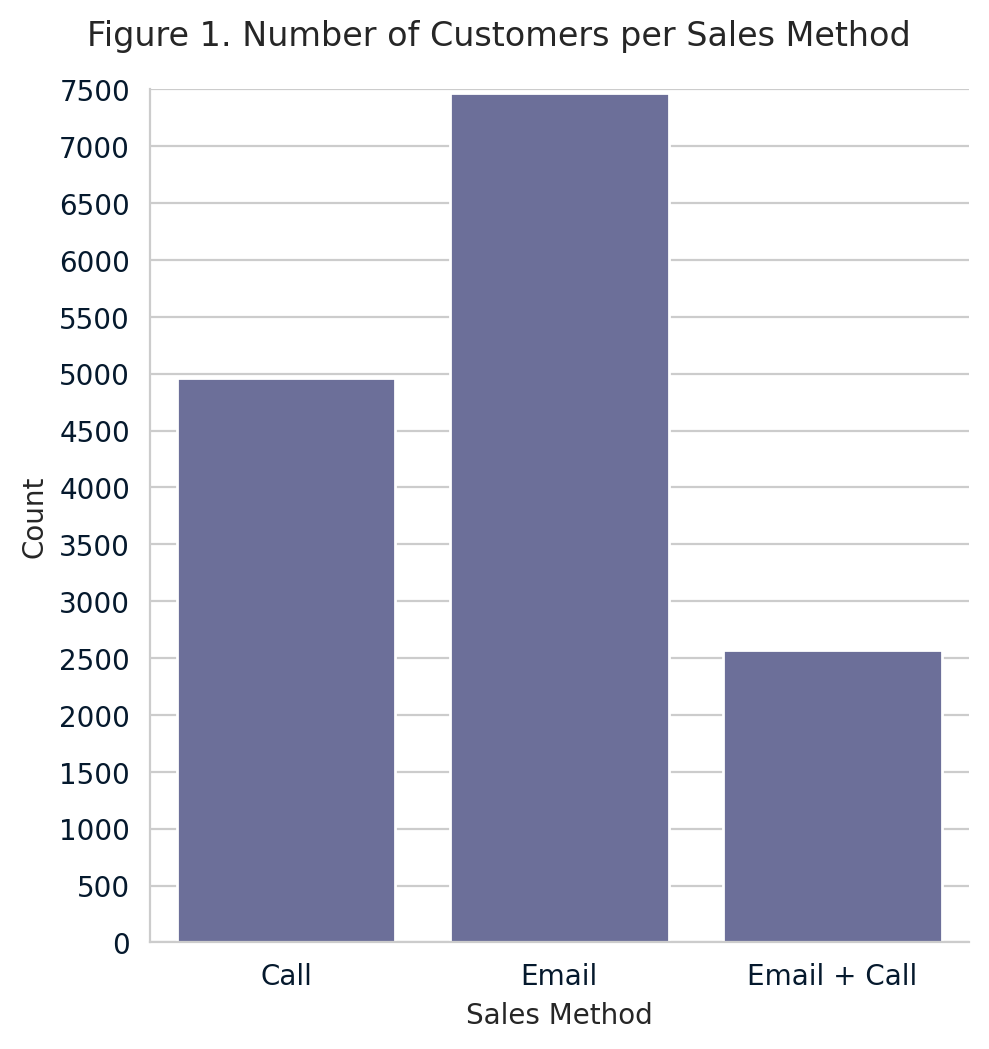

In [11]:
# Boxplot of counts of each sales methods
with sns.axes_style("whitegrid"):
    methods_barchart = sns.catplot(data=avg_revenue_sales, kind='bar', x='sales_method', y='count')
    # Title
    methods_barchart.fig.suptitle("Figure 1. Number of Customers per Sales Method", y=1.04)
    # X ticks and labels
    methods_barchart.set(ylim=(0, 7500), yticks=np.linspace(0, 7500, 16))
    # Axes labels
    methods_barchart.set_axis_labels('Sales Method', 'Count')

Next, the distribution of the total population was visualised using a histogram, shown below as figure 2. To aid in visualising patterns, a kernal density estimate line has been superimposed over the distribution. The bins chosen to fit the data followed the Freedman–Diaconis rule, which took into account the interquartile range (IQR) of revenues. One can now observe that the product sales data did not follow a symmetric, normal distribution, and could argue that the data was right-skewed. The data was polymodal, giving an illusion of revenue falling into bins by spiking at each 25th interval.

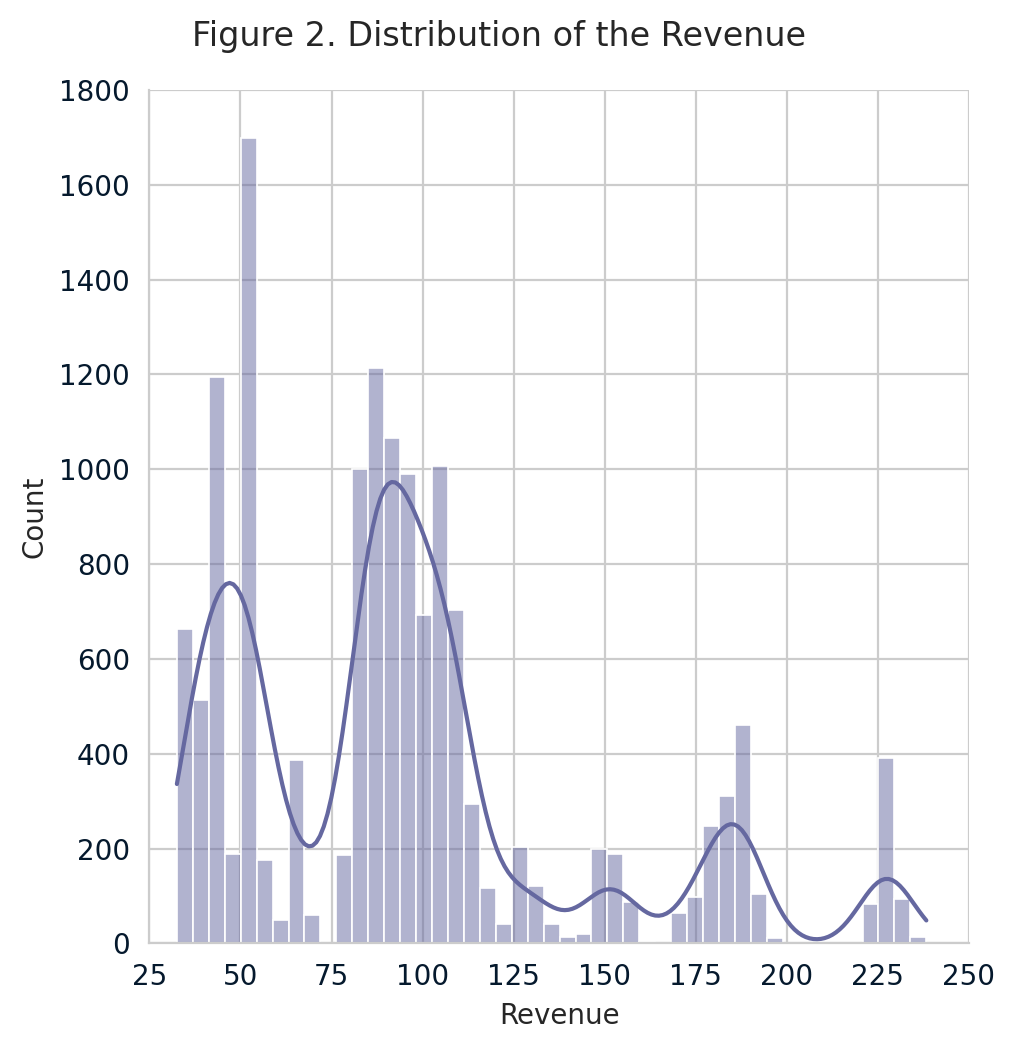

In [12]:
# Histogram of revenue
with sns.axes_style("whitegrid"):
    methods_histplot = sns.displot(data=df, kind='hist', x='revenue', kde=True)
    #sns.move_legend(methods_histplot, "upper left", bbox_to_anchor=(1, 0.7))
    # Title
    methods_histplot.fig.suptitle("Figure 2. Distribution of the Revenue", y=1.04)
    # X ticks
    methods_histplot.set(xlim=(25, 250), xticks=np.linspace(25, 250, 10),
                                            ylim=(0, 1700), yticks=np.linspace(0, 1800, 10))
    # Axes labels
    methods_histplot.set_axis_labels('Revenue', 'Count')

However, by peering into table 3, similar values were observed for both the median and the mean for the individual sales tactics. This indicated that by grouping the data by sales method, more representative qualitative measures could be identified. With this in mind, the email & call observations experienced the greatest variance, being almost 2.61 times more spread out than the next highest, the email-only approach, and 3.23 times bigger than call-only method, when comparing STDs.

Then, the average revenue from each sales method was used to describe the quality of the approach. Where, by and large, customers who were approached using the email & call tactic generated the most revenue per order for the business. With this group spending on average 1.89 times more per order than the email-only samples, and 3.79 times more than the call-only samples.

To support the above statements, boxplots of the individual sales methods were constructed and shown below in figure 3. These visualised the range and distribution of the overall revenue by each sales strategy. Where, one can now observe that although the email & call method had the most variability, it also had the least number of outliers of the 3 methods tested, with the email approach having the most. Since the notches within these boxplots did not overlap, one can conclude that with 95 percent confidence that the true medians did differ from one group to another. Additionally, the skew of the data was confirmed to not be present, as indicated by the distances between the red median line and the black plus of the mean inside the segmented IQRs, due to the distances between these measures being low.

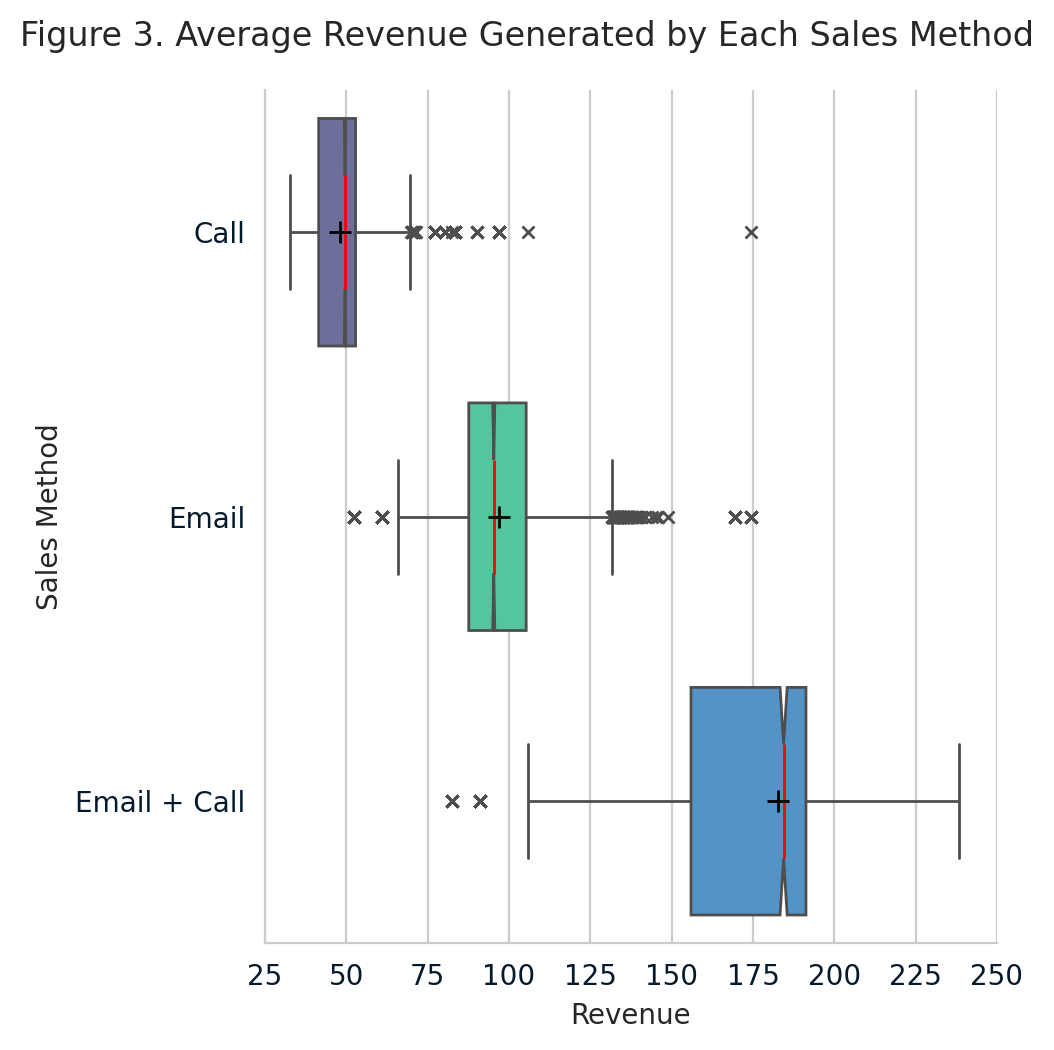

In [13]:
# Boxplot of average revenue by sales methods
with sns.axes_style("whitegrid"):
    methods_boxplot = sns.catplot(data=df, kind='box', y='sales_method', x='revenue', notch=True, hue='sales_method',
                                  legend=False, flierprops={"marker": "x"}, fliersize=4, 
                                  medianprops={"color": "r", "linewidth": 1}, showmeans=True,
                                  meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "8"})
    # Title
    methods_boxplot.fig.suptitle("Figure 3. Average Revenue Generated by Each Sales Method", y=1.04)
    # X ticks and labels
    methods_boxplot.set(xlim=(25, 250), xticks=np.linspace(25, 250, 10))
    # Axes labels
    methods_boxplot.set_axis_labels('Revenue', 'Sales Method')

### Descriptive time-series analysis

The sales method effectiveness was further assessed by seeing their effects over time, by splitting the results by the week number, in a chronological order, as made evident in table 4 below. This time, the STD for all combinations of sales methods was low, with only 1 result exceeding an STD of 15 (week 2 of combination method.) This means that the revenues were now better representated. A recurring pattern once again emerged with the email & call approach generating the greatest average revenue week after week, followed by emails, and then calls. With the only caveat being that email & call method expressed the greatest variability per week by consistently forming the greatest STD of the 3 groups available.

**Table 4.** Summary of the descriptive results obtained from the sales methods, partitioned by week number.

In [15]:
# Average of all revenue, partitioned by week and call
avg_revenue_weekly_sales = df.groupby(['week', 'sales_method'])['revenue'].agg(['count', 'median', 'mean', 'std', 'sum'])
avg_revenue_weekly_sales = avg_revenue_weekly_sales.reset_index().sort_values(['week', 'sales_method'])

# Weekly ratios of each sales methods
avg_revenue_weekly_sales['ratio'] = (avg_revenue_weekly_sales['count'] / avg_revenue_weekly_sales.groupby('week')['count'].transform('sum')) * 100

# Rounding the values for report
avg_revenue_weekly_sales['median'] = avg_revenue_weekly_sales['median'].astype(float).round(2)
avg_revenue_weekly_sales['mean'] = avg_revenue_weekly_sales['mean'].astype(float).round(2)
avg_revenue_weekly_sales['std'] = avg_revenue_weekly_sales['std'].astype(float).round(2)
avg_revenue_weekly_sales['sum'] = avg_revenue_weekly_sales['sum'].astype(float).round(2)
avg_revenue_weekly_sales['ratio'] = avg_revenue_weekly_sales['ratio'].astype(float).round(2)

avg_revenue_weekly_sales

,week,sales_method,count,median,mean,std,sum,ratio
0,1,Call,758,35.15,35.41,2.17,26838.14,20.37
1,1,Email,2815,86.65,87.56,4.88,246486.51,75.65
2,1,Email + Call,148,128.14,124.25,13.27,18388.76,3.98
3,2,Call,805,43.50,43.91,2.93,35351.13,32.32
4,2,Email,1486,99.59,100.29,6.17,149036.76,59.65
5,2,Email + Call,200,153.62,147.35,16.98,29470.37,8.03
6,3,Call,902,41.46,42.04,3.68,37919.81,37.41
7,3,Email,1150,91.74,93.17,7.57,107144.71,47.70
8,3,Email + Call,359,149.67,148.14,7.46,53183.89,14.89
9,4,Call,1005,51.34,52.12,4.55,52384.03,39.03


Not only did the combination method show the greatest average revenue values, but this method also exhibitted the greatest absolute difference of the 3 methods. The difference in average revenue from weeks 1 to 6 for email & calls was 103.38 (growth rate of 83.20%), while for emails it was 39.58 (45.20%), and for calls it was 31.61 (89.27%). This has been shown in figure 4 below. By inspecting the angle of the slopes between the weeks, one can deduce that the email & call strategy saw the most increase in revenue, while the call method saw relatively little improvement on those terms, as the trend line for calls was less steep overall.

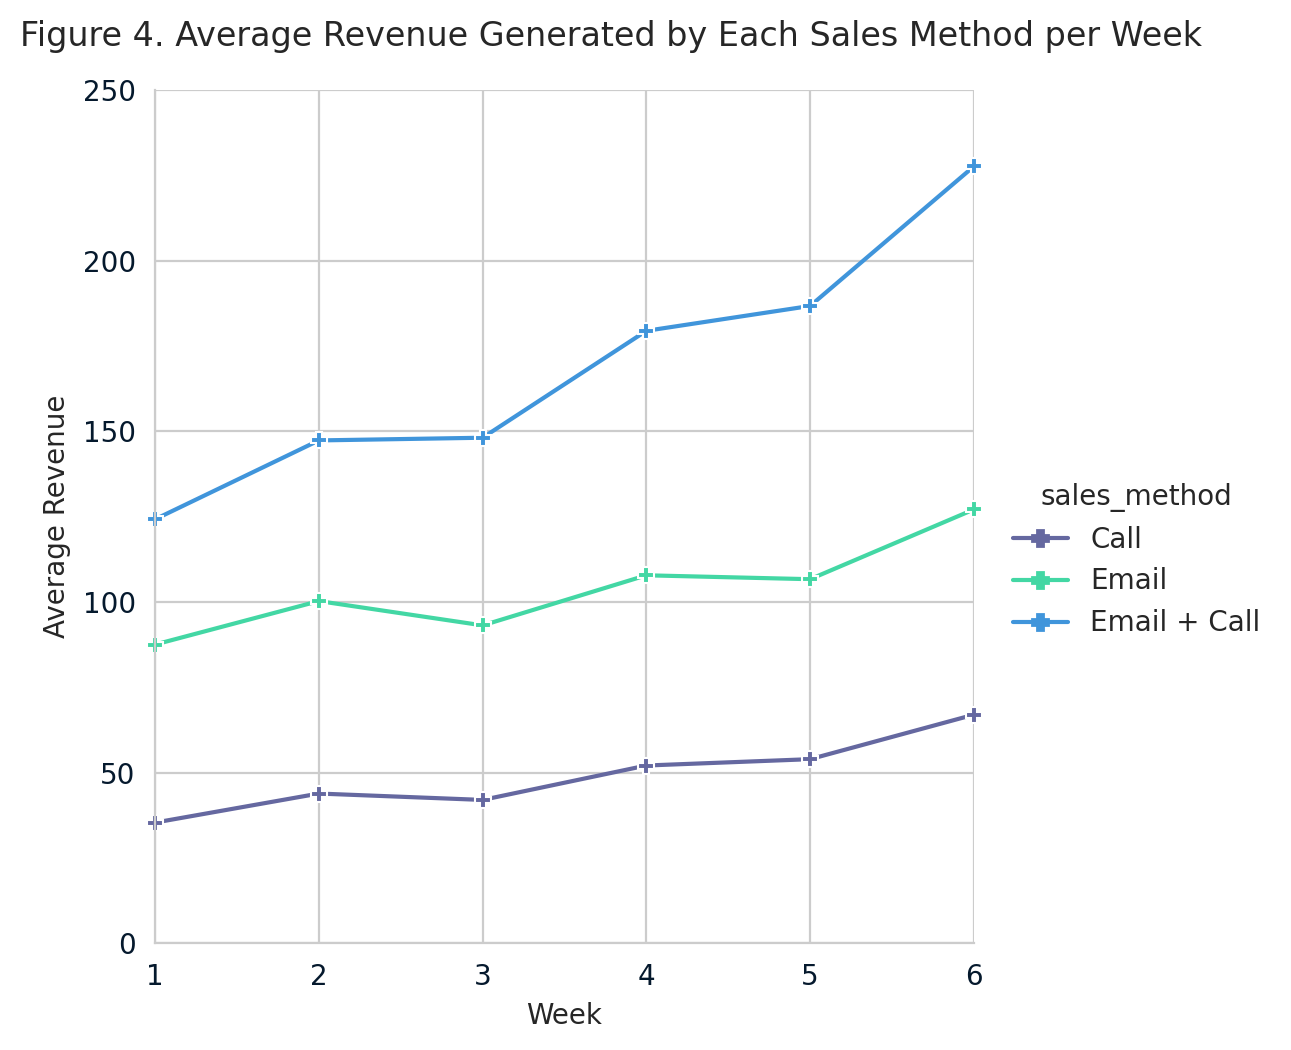

In [16]:
# Lineplot of the average revenue by the different sales methods, by week
with sns.axes_style("whitegrid"):
    weekly_sale_lineplot = sns.relplot(data=avg_revenue_weekly_sales, kind='line', x='week', y='mean', 
                                       hue='sales_method', marker='P', clip_on=False)
    weekly_sale_lineplot.fig.suptitle("Figure 4. Average Revenue Generated by Each Sales Method per Week", y=1.04)
    weekly_sale_lineplot.set(ylim=(0, 250), xlim=(1, 6))
    weekly_sale_lineplot.set_axis_labels("Week", "Average Revenue")
    sns.move_legend(weekly_sale_lineplot, "center right", bbox_to_anchor=(1.04, 0.5))

In [17]:
# Difference in average revenue by calls over time
avg_revenue_call_min = avg_revenue_weekly_sales.loc[(avg_revenue_weekly_sales['sales_method'] == 'Call')]['mean'].min()
avg_revenue_call_max = avg_revenue_weekly_sales.loc[(avg_revenue_weekly_sales['sales_method'] == 'Call')]['mean'].max()
avg_revenue_call_diff = round((avg_revenue_call_max - avg_revenue_call_min), 2)
avg_revenue_call_percent = round((avg_revenue_call_diff / avg_revenue_call_min) * 100, 2)

# Difference in average revenue by emails over time
avg_revenue_email_min = avg_revenue_weekly_sales.loc[(avg_revenue_weekly_sales['sales_method'] == 'Email')]['mean'].min()
avg_revenue_email_max = avg_revenue_weekly_sales.loc[(avg_revenue_weekly_sales['sales_method'] == 'Email')]['mean'].max()
avg_revenue_email_diff = round((avg_revenue_email_max - avg_revenue_email_min), 2)
avg_revenue_email_percent = round((avg_revenue_email_diff / avg_revenue_email_min) * 100, 2)

# Difference in average revenue by email + calls over time
avg_revenue_email_call_min = avg_revenue_weekly_sales.loc[(avg_revenue_weekly_sales['sales_method'] == 'Email + Call')]['mean'].min()
avg_revenue_email_call_max = avg_revenue_weekly_sales.loc[(avg_revenue_weekly_sales['sales_method'] == 'Email + Call')]['mean'].max()
avg_revenue_email_call_diff = round((avg_revenue_email_call_max - avg_revenue_email_call_min), 2)
avg_revenue_email_call_percent = round((avg_revenue_email_call_diff / avg_revenue_email_call_min) * 100, 2)

print(f'The difference in average revenue over time for calls was {avg_revenue_call_diff} ({avg_revenue_call_percent} %), while for emails it was {avg_revenue_email_diff} ({avg_revenue_email_percent} %), and for emails + calls it was {avg_revenue_email_call_diff} ({avg_revenue_email_call_percent} %.)')

# Percentage of total calls week 1
percent_call_week_1 = avg_revenue_weekly_sales.at[0, 'ratio']
percent_email_call_week_1 = avg_revenue_weekly_sales.at[2, 'ratio']
percent_total_calls_week_1 = percent_call_week_1 + percent_email_call_week_1

# Percentage of total calls week 4
percent_call_week_4 = avg_revenue_weekly_sales.at[9, 'ratio']
percent_email_call_week_4 = avg_revenue_weekly_sales.at[11, 'ratio']
percent_total_calls_week_4 = percent_call_week_4 + percent_email_call_week_4

# Difference in percentage from weeks 1 to 4
total_calls_diff = percent_total_calls_week_4 - percent_total_calls_week_1
percent_calls_diff = round(((total_calls_diff / percent_total_calls_week_1) * 100), 2)

print(f'Total calls in week 1 was {percent_total_calls_week_1}, while in week 4 it was {percent_total_calls_week_4}. Resulting in an absoolute difference of {total_calls_diff} ({percent_calls_diff} %.)')

The difference in average revenue over time for calls was 31.6 (89.24 %), while for emails it was 39.57 (45.19 %), and for emails + calls it was 103.38 (83.2 %.)
Total calls in week 1 was 24.35, while in week 4 it was 58.25. Resulting in an absoolute difference of 33.9 (139.22 %.)


Following this trail of thought, the average revenue generated per week could be proposed as a viable business metric to track by the sales team, as shown below in figure 5. Where the goal for the Sales team would be to push for higher volume of items per order (larger nb_sold). Following on from the 6-week testing window, the revenue value to beat appears to be 152.91.

In [31]:
# Average of all revenue, partitioned by week
weekly_revenue = df.groupby('week')['revenue'].agg(['count', 'median', 'mean', 'std', 'sum'])
weekly_revenue = weekly_revenue.reset_index().sort_values('week')

# Rounding the values for report
weekly_revenue['median'] = weekly_revenue['median'].astype(float).round(2)
weekly_revenue['mean'] = weekly_revenue['mean'].astype(float).round(2)
weekly_revenue['std'] = weekly_revenue['std'].astype(float).round(2)
weekly_revenue['sum'] = weekly_revenue['sum'].astype(float).round(2)

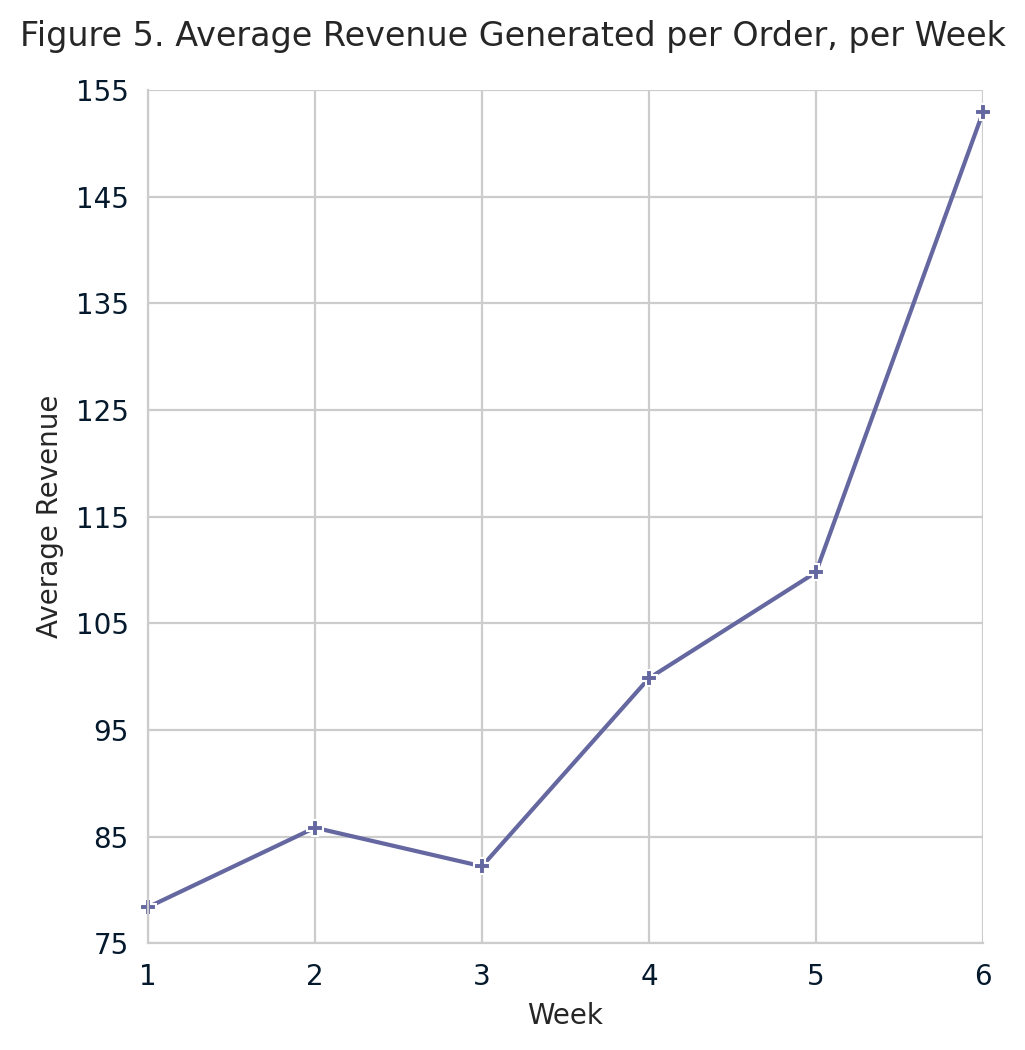

In [22]:
# Lineplot of the average revenue per week
with sns.axes_style("whitegrid"):
    weekly_revenue_lineplot = sns.relplot(data=weekly_revenue, kind='line', x='week', y='mean', 
                                          marker='P', clip_on=False)
    weekly_revenue_lineplot.fig.suptitle("Figure 5. Average Revenue Generated per Order, per Week", y=1.04)
    weekly_revenue_lineplot.set(ylim=(75, 155), yticks=np.linspace(75, 155, 9),
                                xlim=(1, 6))
    weekly_revenue_lineplot.set_axis_labels("Week", "Average Revenue")

Another possible metric to track could be the total revenue made per week, as shown in figure 6 below. Where the aim for the Sales department would be to sell as many products within a week as possible. In which, the 6-week testing window closed on a value of 187775.38, meaning that this would be the metric to overcome.

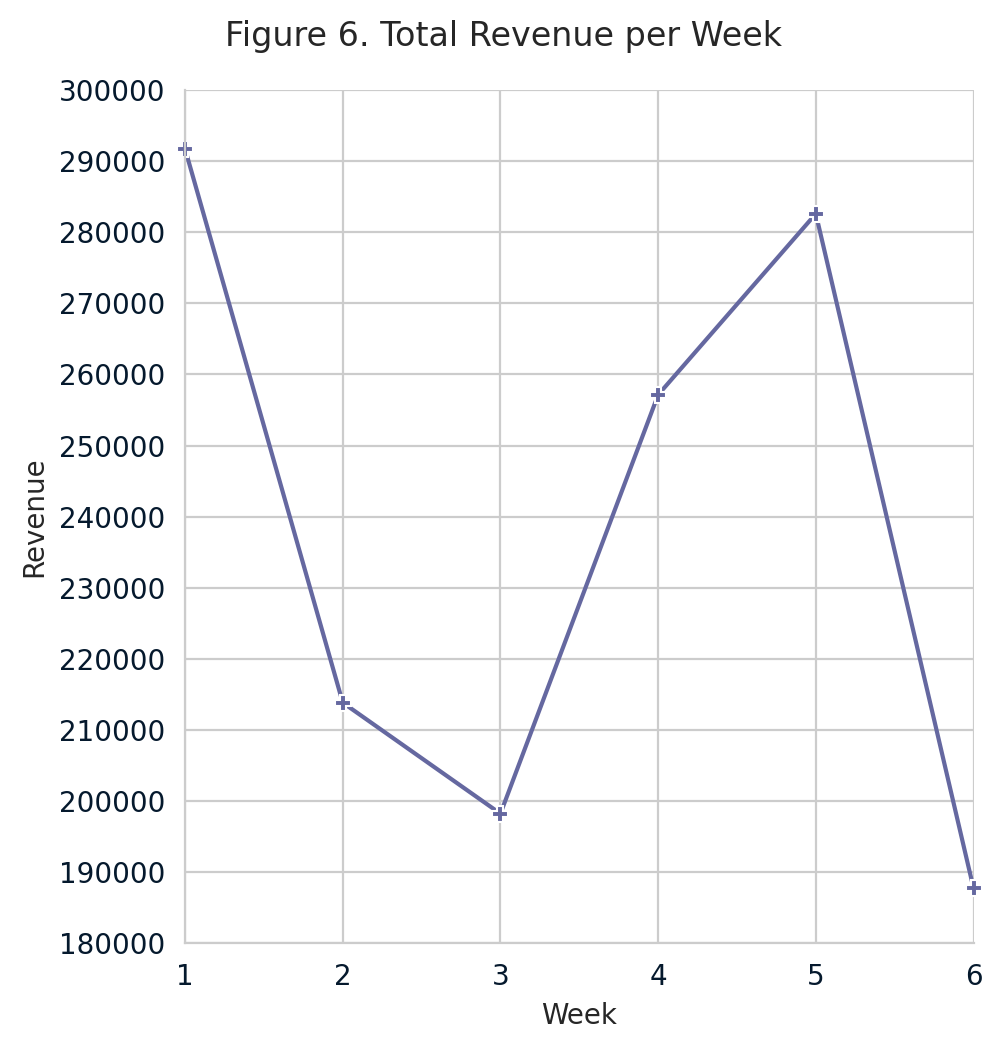

In [29]:
# Lineplot of the total revenue by week
with sns.axes_style("whitegrid"):
    weekly_revenue_lineplot = sns.relplot(data=weekly_revenue, kind='line', x='week', y='sum', 
                                          marker='P', clip_on=False)
    weekly_revenue_lineplot.fig.suptitle("Figure 6. Total Revenue per Week", y=1.04)
    weekly_revenue_lineplot.set(ylim=(180000, 300000), yticks=np.linspace(180000, 300000, 13),
                                xlim=(1, 6))
    weekly_revenue_lineplot.set_axis_labels("Week", "Revenue")

## 4. Conclusion

Taking into account the time constraints of calls compared to a mass published email to all customers in the database, it is clear that email communication of marketing is a more suitable tactic for the promotion of a new products sale. There was evidence suggesting that customers responded to targetted email marketting better than compared to calls, as a greater volume of orders were completed while providing higher average revenue per order. With the sales' brief hinting at cold calls taking upwards of 30 mins per customer, the call-only approach does not appear to be an efficient use of time and effort. On the contrary, the combination method saw the highest average revenue per order, an improvement over the email approach.

The Sales department can use the insight from this analysis to make an informed decision to continue to use the combination approach in their future marketting efforts, alongside an initial email-only campaign. It would be recommended to reduce the number of attempts of the call-only approach, as they produced the least total revenue, accounted for the smallest orders, and took up the most time from sales representatives.

A possible metric to track would be the average revenue generated per unique customer ID. This would reduce the need to make as many sales to make  an equal sum of revenue, relieving pressure from the sales team and save the business on associated shipment and processing costs. The starting value to beat for this metric is 152.91. This could be paired alongside a weekly total revenue metric, which currently stands at 187775.38, and monitors the performance of the sale by measuring the current bottom-line.

A proposed continuation study could be to quantify the success rate (measuring the number of unsuccessful attempts made) for each method. Where it is hypothesized that the call-only strategy would perform worse, and by contrast, the combination approach could gain further justification for its application. In other words, this addition would help determine how effective the sales pitches were.